<h2 style="color:blue" align="center">Handwritten digits classification using ANN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

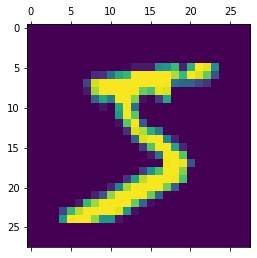

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

# <h3 style='color:purple'>Using ANN for classification</h3>

In [11]:
model = model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2736 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1231 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0664 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0537 - accuracy: 0.9836


In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9748


[0.08005133271217346, 0.9747999906539917]

# Callbacks

In [16]:
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau

# ModelCheckpoint

In [17]:
model = model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
def scheduler(epoch, learning_rate):
  if epoch < 15:
    return learning_rate
  else:
    return learning_rate * 0.99

In [20]:
checkpoint = LearningRateScheduler(scheduler,verbose = 1)

In [21]:
model.fit(X_train_flattened, y_train, epochs=50, batch_size=128, validation_data=(X_test_flattened,y_test), callbacks=[checkpoint])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.3855 - accuracy: 0.8937 - val_loss: 0.2179 - val_accuracy: 0.9398 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1875 - accuracy: 0.9470 - val_loss: 0.1537 - val_accuracy: 0.9562 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1383 - accuracy: 0.9608 - val_loss: 0.1260 - val_accuracy: 0.9648 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1092 - accuracy: 0.9686 - val_loss: 0.1127 - val_accuracy: 0.9675 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0

In [22]:
# accuracy on validation set

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9796


[0.10554515570402145, 0.9796000123023987]

In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9796


[0.10554515570402145, 0.9796000123023987]